**CAR PRICES**

Importing the Necessary Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Importing the Given Dataset and Dropping the Irrevelant Features

In [57]:
car_price = pd.read_csv(r"C:\Users\asus\Downloads\CarPrices\CarPrice_Assignment.csv")
data = car_price.drop(["CarName","enginelocation", "fuelsystem"], axis=1)

Encoding The non-numeric Features

In [54]:
columns_to_encode = ["fueltype","aspiration","doornumber","drivewheel","cylindernumber","carbody","enginetype"]
label_mappings = {}
for column in columns_to_encode:
    unique_categories = data[column].unique()
    label_mapping = {}
    for i, category in enumerate(unique_categories):
        label_mapping[category] = i
    label_mappings[column] = label_mapping
for column, label_mapping in label_mappings.items():
    data[column] = data[column].map(label_mapping)
print(data.describe())

           car_ID   symboling    fueltype  aspiration  doornumber    carbody  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.00000   
mean   103.000000    0.834146    0.097561    0.180488    0.560976    1.80000   
std     59.322565    1.245307    0.297446    0.385535    0.497483    0.83666   
min      1.000000   -2.000000    0.000000    0.000000    0.000000    0.00000   
25%     52.000000    0.000000    0.000000    0.000000    0.000000    1.00000   
50%    103.000000    1.000000    0.000000    0.000000    1.000000    2.00000   
75%    154.000000    2.000000    0.000000    0.000000    1.000000    2.00000   
max    205.000000    3.000000    1.000000    1.000000    1.000000    4.00000   

       drivewheel   wheelbase   carlength    carwidth  ...  cylindernumber  \
count  205.000000  205.000000  205.000000  205.000000  ...      205.000000   
mean     0.673171   98.756585  174.049268   65.907805  ...        0.502439   
std      0.556171    6.021776   12.337289    

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

Since all the values are now in numerical form we can do linear regression

In [56]:
X = data.drop("price", axis=1)
y = data["price"]

Using feature scaling

In [58]:
fmin = X.min(axis=0)
frange = X.max(axis=0) - X.min(axis=0)
X = (X - fmin) / frange

Train Test Split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Defining the Hyperparameters

In [77]:
weights = np.random.randn(X_train.shape[1]) * 0.01
bias = 0.01
learning_rate = 0.01
iterations = 5000
alpha = 0.1
cost_history = []

Linear Regression Model

R-squared (R²) value: 0.8344


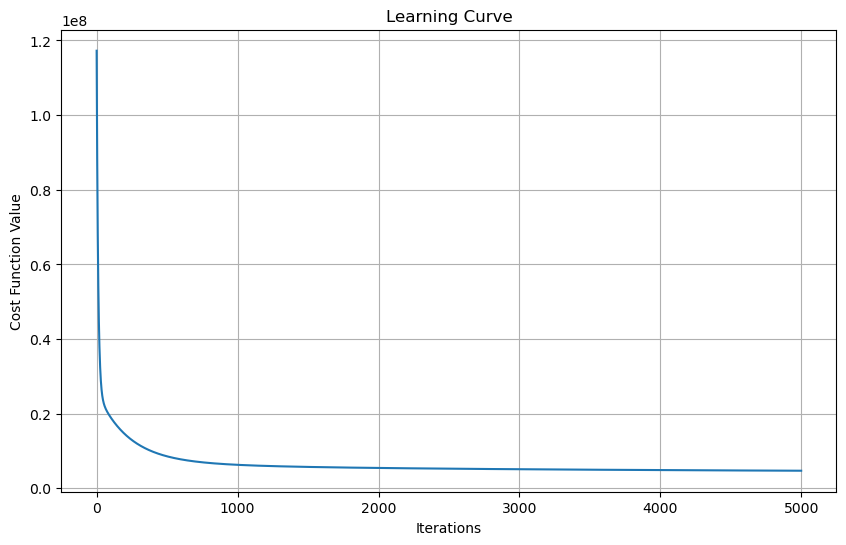

In [78]:

def costFunction(y, predictions, weights, alpha):
    N = len(y)
    sq_error = (predictions - y) ** 2
    regularization_term = (alpha / (2 * N)) * np.sum(weights**2)
    return (1.0 / (2 * N)) * sq_error.sum() + regularization_term


for i in range(iterations):
    predictions = np.dot(X_train, weights) + bias
    error = predictions - y_train
    N = X_train.shape[0]
    dw = (1 / N) * np.dot(X_train.T, error) + (alpha / N) * weights
    db = np.sum(error) / N
    weights -= learning_rate * dw
    bias -= learning_rate * db
    current_cost = costFunction(y_train, predictions, weights, alpha)
    cost_history.append(current_cost)


predictions_test = np.dot(X_test, weights) + bias
y_mean = y_test.mean()
tss = ((y_test - y_mean) ** 2).sum()
rss = ((y_test - predictions_test) ** 2).sum()
r_squared = 1 - (rss / tss)

print(f'R-squared (R²) value: {r_squared:.4f}')


plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.grid(True)
plt.show()